In [1]:
! pip3 install pandas
! pip3 install matplotlib.pyplot
! pip3 install plotly.express
! pip3 install openpyxl
! pip3 install petl

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import petl as etl
import glob as glob
import os

In [3]:
track_product_df = pd.read_csv('final_consumer_behaviour_df.csv')

track_product_df.info(verbose=False, memory_usage='deep')

/Users/jontylees/Python/final-project/data_transformation/.env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83077783 entries, 0 to 83077782
Columns: 14 entries, Unnamed: 0 to category
dtypes: float64(7), int64(1), object(6)
memory usage: 37.2 GB


In [37]:
track_product_df.head(25)

,Unnamed: 0,year,month,day,hour,amount_in_gbp,branch_name,quantity,product,region,county,established_on,manufactuter,category
0,166,2012.0,1.0,10.0,0.0,367.50,Armagh outlet,125.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
1,370,2012.0,1.0,10.0,0.0,44.10,Armagh outlet,15.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
2,411,2012.0,1.0,10.0,0.0,311.64,Armagh outlet,106.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
3,553,2012.0,1.0,10.0,0.0,149.94,Armagh outlet,51.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
4,904,2012.0,1.0,16.0,1.0,308.70,Armagh outlet,105.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
5,979,2012.0,1.0,12.0,2.0,455.70,Armagh outlet,155.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
6,1128,2012.0,1.0,25.0,4.0,97.02,Armagh outlet,33.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
7,1177,2012.0,1.0,25.0,4.0,147.00,Armagh outlet,50.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
8,1366,2012.0,1.0,25.0,4.0,196.98,Armagh outlet,67.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
9,1444,2012.0,1.0,25.0,4.0,502.74,Armagh outlet,171.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish


### Track the most purchased and least purchased products & product categories overall, per region and per county

In [40]:
regional_data = track_product_df.loc[track_product_df['region'] == 'London'] # Replace Northen Ireland with variable
county_data =  track_product_df.loc[track_product_df['county']== 'York']

sorted_selling_products = regional_data.groupby('product')['quantity'].sum().sort_values(ascending=False)

most_selling_products= sorted_selling_products.head(5)
least_selling_products = sorted_selling_products.tail(5)

Text(0.5, 1.0, 'Northern Ireland Most Purchased')

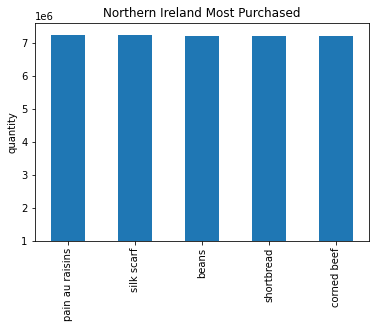

In [41]:
most_selling_products.plot.bar(x=('product'), y=["quantity"])
plt.xlabel(None)
plt.ylabel('quantity')
plt.ylim(bottom=1000000)
plt.title('Northern Ireland Most Purchased')

Text(0.5, 1.0, 'Northern Ireland Least Purchased')

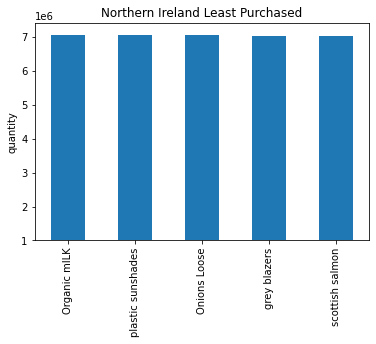

In [42]:
least_selling_products.plot.bar(x=('product'), y=["quantity"])
plt.xlabel(None)
plt.ylabel('quantity')
plt.ylim(bottom=1000000)
plt.title('Northern Ireland Least Purchased')


highest_quantity.plot.pie(y='best_performing', legend=None, explode=(highest_quantity.best_performing == max(highest_quantity.best_performing)) * 0.15, autopct = "%0.2f%%", radius=1.6, rotatelabels=True)
plt.ylabel(None)

### Track the best performing branches overall per region and per county (performance is measured in both item quantity sold and monetary value of sales made)

<AxesSubplot:xlabel='branch_name'>

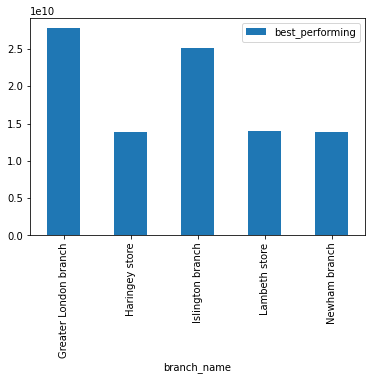

In [61]:
highest_quantity = regional_data.groupby('branch_name')[['amount_in_gbp', 'quantity']].sum()

highest_quantity['best_performing'] = highest_quantity.apply(lambda row: row.amount_in_gbp + row.quantity, axis=1).sort_values(ascending=True)

# highest_quantity.pivot(index='branch_name', columns='Index', values='best_performing')

highest_quantity = highest_quantity.reset_index()

highest_quantity



highest_quantity.plot.bar(x=('branch_name') , y=['best_performing'])

### Per hour sales for the top 10 branches of 2021 identified

In [121]:
track_product_df.head(3)

,Unnamed: 0,year,month,day,hour,amount_in_gbp,branch_name,quantity,product,region,county,established_on,manufactuter,category
0,166,2012.0,1.0,10.0,0.0,367.50,Armagh outlet,125.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
1,370,2012.0,1.0,10.0,0.0,44.10,Armagh outlet,15.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
2,411,2012.0,1.0,10.0,0.0,311.64,Armagh outlet,106.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish


In [182]:

year_filtered_df = track_product_df.loc[track_product_df['year']== 2020]

In [204]:
top_10 = year_filtered_df.groupby('branch_name')['amount_in_gbp'].sum().sort_values(ascending=False).reset_index()
top_10_total = top_10.rename(columns={"amount_in_gbp":"total_gbp"})

top_10_total

,branch_name,total_gbp
0,East Lindsey branch,4.308087e+09
1,Falkirk branch,4.161411e+09
2,Neath Port Talbot outlet,2.866620e+09
3,West Somerset branch,2.858195e+09
4,Kent branch,2.855607e+09
...,...,...
64,East Dunbartonshire branch,1.328065e+09
65,Lichfield outlet,1.315833e+09
66,Chiltern store,1.311946e+09
67,Bassetlaw outlet,1.279487e+09


In [221]:
branch_hour_grouped_df = year_filtered_df.groupby(['branch_name', 'hour'])['amount_in_gbp'].sum().reset_index()
branch_hour_grouped_df.head(50)


,branch_name,hour,amount_in_gbp
0,Armagh outlet,0.0,60160249.41
1,Armagh outlet,1.0,70902546.13
2,Armagh outlet,2.0,52887101.78
3,Armagh outlet,3.0,50955828.40
4,Armagh outlet,4.0,62210362.02
...,...,...,...
1651,York outlet,19.0,44943966.88
1652,York outlet,20.0,55833495.25
1653,York outlet,21.0,62792650.35
1654,York outlet,22.0,62704732.18


<AxesSubplot:xlabel='hour'>

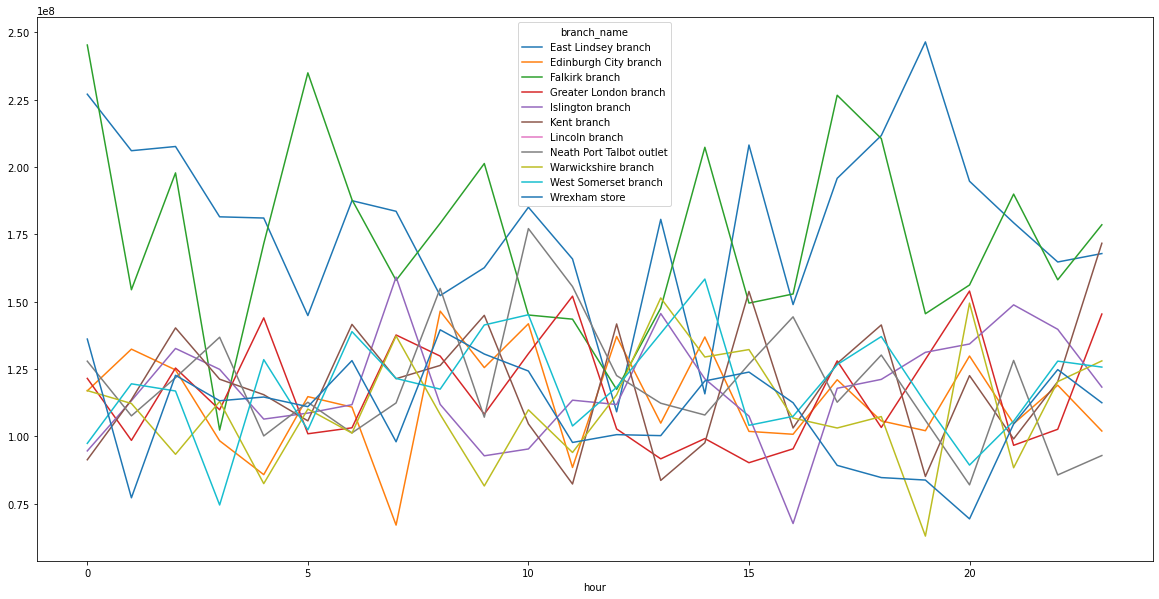

In [268]:
merged_hourly_and_total_gbp = top_10_total.merge(branch_hour_grouped_df.set_index('branch_name'), on='branch_name').reset_index()

merged_hourly_and_total_gbp.sort_values(by=['total_gbp','hour'], ascending=False)
top_merged_hourly_and_total_gbp = merged_hourly_and_total_gbp.loc[0:240]

hourly_df = top_merged_hourly_and_total_gbp.pivot(index='hour', columns='branch_name', values='amount_in_gbp')

hourly_df.plot(figsize=(20,10))

### Identify the top 10 and bottom 10 profitable branches and indicate how profitable they are.

In [193]:
top_10 = year_filtered_df.groupby('branch_name')['amount_in_gbp'].sum().sort_values(ascending=False).reset_index()

In [194]:
branch_expenses_df = pd.read_csv('branch_expenses.csv')

In [195]:
branch_expenses_df
branch_expenses_df['total_expenses'] = branch_expenses_df.apply(lambda row: row.operational_cost + row.staff_bonuses + row.misc_expenses + row.waste_cost, axis=1)

In [196]:
total_branch_expenses =branch_expenses_df.groupby('branch_name')['total_expenses'].sum().reset_index()

In [197]:
branch_total_sales_and_expense_df = top_10.merge(total_branch_expenses.set_index('branch_name'), on='branch_name') 

In [198]:
branch_total_sales_and_expense_df['profitability'] = branch_total_sales_and_expense_df.apply(lambda row: row.amount_in_gbp - row.total_expenses, axis=1)

In [199]:
branch_total_sales_and_expense_df.sort_values(by='profitability', ascending=False)
top_profitability_stores = branch_total_sales_and_expense_df.head(10)
bottom_profitability_stores = branch_total_sales_and_expense_df.tail(10)


Text(0.5, 1.0, 'Top Profitable Stores 2021')

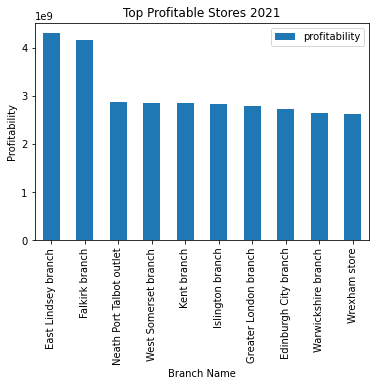

In [200]:
top_profitability_stores.plot.bar(x=('branch_name'), y=['profitability'])
plt.xlabel('Branch Name')
plt.ylabel('Profitability')
plt.title('Top Profitable Stores 2021')

Text(0.5, 1.0, 'Least Profitable Stores 2021')

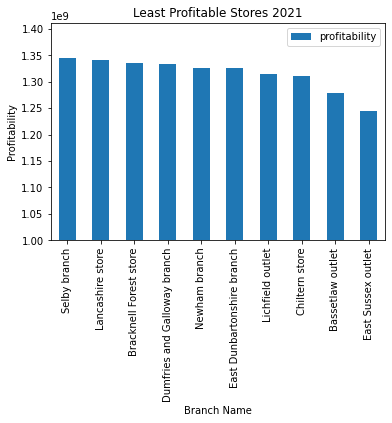

In [201]:
bottom_profitability_stores.plot.bar(x=('branch_name'), y=['profitability'])
plt.ylim(bottom= 1.00000e+09)
plt.xlabel('Branch Name')
plt.ylabel('Profitability')
plt.title('Least Profitable Stores 2021')

In [202]:
bottom_profitability_stores

,branch_name,amount_in_gbp,total_expenses,profitability
58,Selby branch,1.345518e+09,1407190.0,1.344111e+09
59,Lancashire store,1.341766e+09,1399915.0,1.340366e+09
60,Bracknell Forest store,1.336547e+09,1584912.0,1.334962e+09
61,Dumfries and Galloway branch,1.334377e+09,1577602.0,1.332799e+09
62,Newham branch,1.328083e+09,1730990.0,1.326352e+09
63,East Dunbartonshire branch,1.328065e+09,1391041.0,1.326674e+09
64,Lichfield outlet,1.315833e+09,1705358.0,1.314127e+09
65,Chiltern store,1.311946e+09,1700462.0,1.310245e+09
66,Bassetlaw outlet,1.279487e+09,1725878.0,1.277761e+09
67,East Sussex outlet,1.246949e+09,1727914.0,1.245221e+09
